### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:
strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, strategy='best1bin', popsize=1,
    tol=0.1, mutation=[0.1, 0.4], recombination=0.9, updating='immediate')
result

     fun: 4.422173294216236e-09
     jac: array([1.96997725, 2.28095089])
 message: 'Optimization terminated successfully.'
    nfev: 188
     nit: 3
 success: True
       x: array([-1.48554661e-09, -4.87446462e-10])

Минимальное количество итераци с параметрами: strategy='best1bin', popsize=1, 
tol=0.1, mutation=[0.1, 0.4], recombination=0.9, updating='immediate'

In [11]:
dict_strategy = {}
result2 = ''

for elem in range(1, 9):
    result2 = differential_evolution(ackley, bounds, seed=42, popsize=elem)
    if result2.success is True:
        dict_strategy[elem]=result2.nit

In [12]:
dict_strategy

{1: 7, 2: 7, 3: 29, 4: 39, 5: 100, 6: 99, 7: 87, 8: 97}

Text(0, 0.5, 'nit')

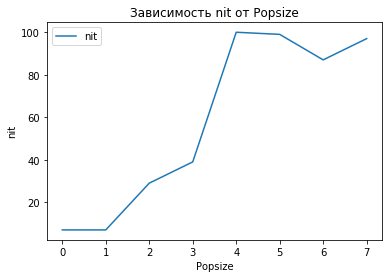

In [20]:
import matplotlib.pyplot as plt
import pandas as pd 

df=pd.DataFrame(dict_strategy.items(), columns=('Popsize', 'nit'))

ax = df.plot(y='nit', title='Зависимость nit от Popsize')
ax.set_xlabel("Popsize")
ax.set_ylabel("nit")